<a href="https://colab.research.google.com/github/gutak12345/Gustavo-Adolfo-Martinez-Misal/blob/master/TRABAJO_FINAL_TEXT_AND_WEB_ANALITICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO FINAL TEXT AND WEB ANALITICS**

*Predecir las intenciones de compra de los compradores en línea.*

Por:



*   Juana Avila
*   Javier Mendieta
*   Gustavo Martinez





1**.Cargue los datos en Python**

In [1]:
# Setting up packages for data manipulation and machine learning
import calendar
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm, pyplot
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns

# Load train data
# label: Revenue
filepath = "/content/online_shoppers_intention.csv"
dfshopping = pd.read_csv(filepath)

2.**Explorando los datos**

In [2]:
# Exploring the data
print(dfshopping.shape)
dfshopping.head(5)

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Checking the balance of labels
dfshopping['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [5]:
# Replacing visitor_type to int
print(dfshopping['VisitorType'].unique())
dfshopping = dfshopping.replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})

# Coverting month column to numeric numeric values
df = dfshopping.copy()
monthlist = dfshopping['Month'].replace('June', 'Jun')
mlist = []
m = np.array(monthlist)
for mi in m:
    a = list(calendar.month_abbr).index(mi)
    mlist.append(a)
df['Month'] =  mlist
df

['Returning_Visitor' 'New_Visitor' 'Other']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,False,False


In [6]:
print(df.isnull().sum())
df.isna().sum()
# Delete records with NAs
df.dropna(inplace=True)

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


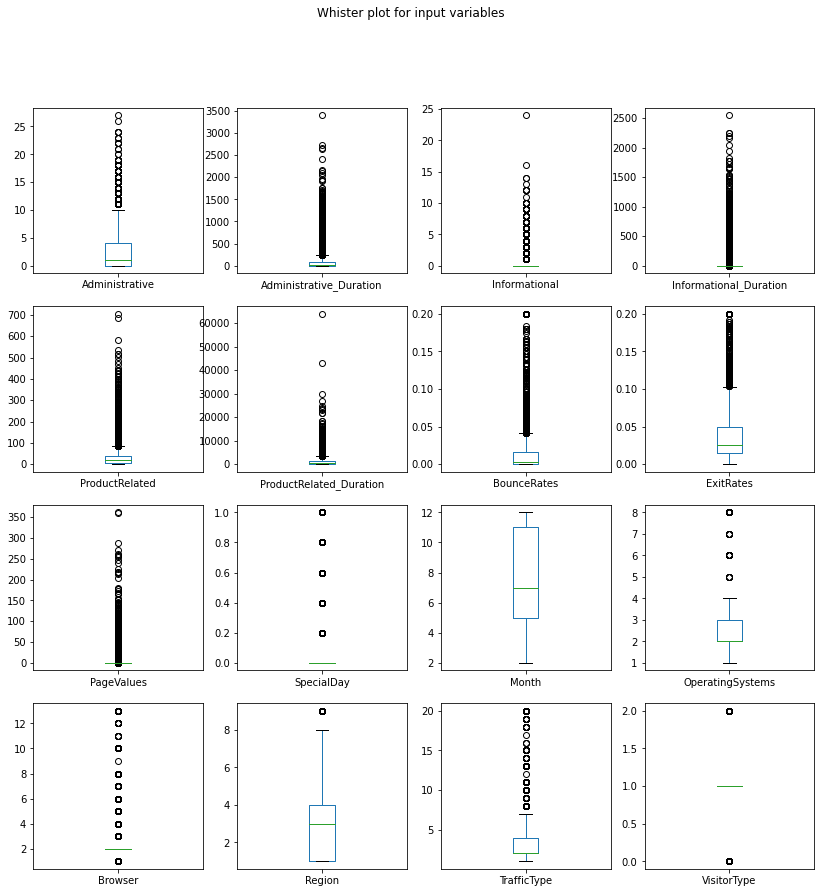

In [7]:
# Whiskerplots
c = 'black'
df.drop('Revenue', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,14), 
                                        title='Whister plot for input variables')
plt.savefig('shopping_box')
plt.show()

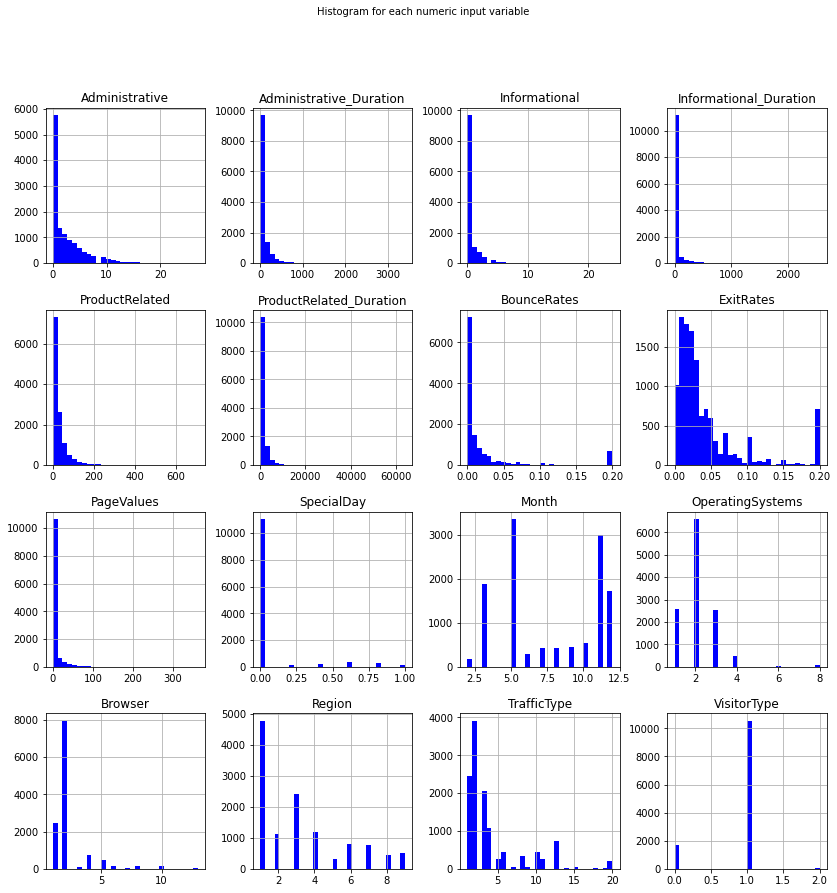

In [8]:
# Histograms
df.drop(['Revenue', 'Weekend'], axis=1).hist(bins=30, figsize=(14, 14), color='blue')
plt.suptitle("Histogram for each numeric input variable", fontsize=10)
plt.savefig('shopping_hist')
plt.show()

3.**Entrenamiento de un modelo de regresión logística que clasifique las intenciones de compra de los compradores en línea**

In [9]:
# Separate labels from training data
features = ['Administrative', 'Administrative_Duration', 'Informational', 
            'Informational_Duration', 'ProductRelated', 'ProductRelated', 
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
            'Month', 'Region', 'TrafficType', 'VisitorType']
X = df[features] #Training data
y = df['Revenue'] #Prediction label

# Split the data into x_train and y_train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Training a classification model using logistic regression 
logreg = LogisticRegression(solver='lbfgs')
score = logreg.fit(X_train, y_train).decision_function(X_test)

4.**Evaluación del desempeño del modelo**

Text(0.5, 384.16, 'Predicted label')

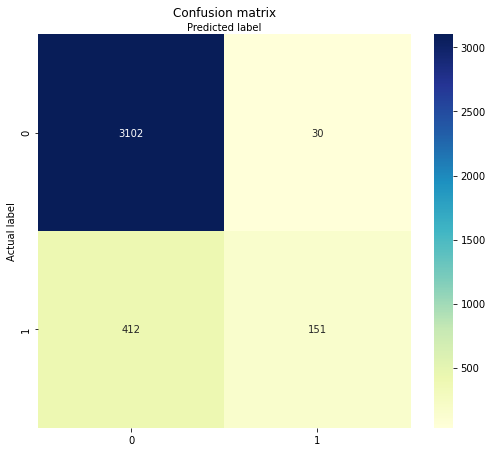

In [11]:
# create a confusion matrix
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# create heatmap
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

5.**Métricas de rendimiento para modelos de clasificación**

In [12]:
from sklearn.metrics import precision_score, accuracy_score, f1_score,  recall_score 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.88
Precision: 0.83
Recall: 0.27
f1_score: 0.41
